This lecture note is based on "An Introduction to NUMERICAL ANALYSIS" (2nd Edition) <br> by Kendall E. Atkinson


# Chapter 3. INTERPOLATION THEORY

## 3.1 Polynomial Interpolation Theory

Let $x_0,\ x_1,\ \cdots,\ x_n$ be distinct real or complex numbers, and let $y_0,\ y_1,\ \cdots,\ y_n$ be associated function values.
<br>
<br>

**Goal**: finding a polynomial $p(x)$ that interpolates the given data:
<br>

$$p(x_i) = y_i,\quad i = 0,\ 1,\ \cdots,\ n.$$

Consider a general polynomial of degree $n$

$$p(x) = a_0 + a_1 x + \cdots + a_n x^n$$
<br>
<br>

- $n+1$ data: $p(x_i) = y_i, \quad i = 0,\ 1,\ \cdots,\ n$
<br>

- $n+1$ unknowns: $a_0,\ a_1,\ \cdots, a_n$

Find $a_0,\ a_1,\ \cdots,\ a_n$ such that

$$\begin{array}{c l} a_0 + a_1 x_0 + a_2 x_0^2 + \cdots + a_n x_0^n &= y_0 \\
a_0 + a_1 x_1 + a_2 x_1^2 + \cdots + a_n x_1^n &= y_1 \\
\vdots & \\
a_0 + a_1 x_n + a_2 x_n^2 + \cdots + a_n x_n^n &= y_n
\end{array}$$

In vector and matrix notation, the system is

$$\Large X\boldsymbol{a} = \boldsymbol{y}$$
<br>

- $X = [x_i^j] \qquad i,\ j = 0,\ 1,\ \cdots,\ n$
<br>

- $\boldsymbol{a} = [a_0,\ a_1,\ \cdots,\ a_n]^T$
<br>

- $\boldsymbol{y} = [y_0,\ y_1,\ \cdots,\ y_n]^T$
<br>

The matrix $X$ is called a *Vandermonde matrix*.

### Existence and uniqueness

***
**Theorem 3.1** &emsp; Given $n+1$ distinct points $x_0,\ \cdots,\ x_n$ and $n+1$ ordinates $y_0,\ \cdots,\ y_n$, there is a polynomial $p(x)$ of degree$\le n$ that interpolates $y_i$ at $x_i,\ i=0,\ \cdots,\ n$. This polynomial $p(x)$ is unique among the set of all polynomials of degree at most $n$.
***

### Lagrange's formula

For the interpolation polynomial

$$p_n(x) = \sum_{i=0}^n y_i \ell_i(x)$$
<br>

where
$$\ell_i(x) = \prod_{\substack{j=0 \\ (j\neq i)}}^n \frac{x - x_j}{x_i - x_j}$$

### Lagrange error formula
<br>

***
**Theorem 3.2** &emsp; Let $x_0,\ \cdots,\ x_n$ be distinct real numbers, and let $f$ be a given real valued function with $n+1$ continuous derivatives on the interval $I_t = \mathcal{H}\{t,x_0,\cdots,x_n\}$, with $t$ some given real number.
Then there exists $\xi \in I_t$ with
$$f(t) - \sum_{j=0}^n f(x_j)\ell_j(t) = \frac{(t-x_0)\cdots(t-x_n)}{(n+1)!}f^{(n+1)}(\xi)$$
***
<br>

($\mathcal{H}\{a,b,c,\cdots\}$ denotes the smallest interval containing all of the real numbers $a,\ b,\ c,\ \cdots$.)

<span style="color:blue">[Example]</span> &emsp; For $f(x) = \log_{10} x$, apply $n=1$ to find the error bound

(sol) $\displaystyle f''(x) = -\frac{\log_{10} e}{x^2}$ with $\log_{10} e \approx 0.434$.
Let $x_0<x<x_1$, then we have
$$E(x) = \frac{(x-x_0)(x_1-x)}{2}\cdot\frac{\log_{10} e}{\xi^2},\quad x_0\le \xi \le x_1$$
which yields
$$\frac{(x-x_0)(x_1-x)}{2}\cdot\frac{\log_{10} e}{x_1^2} \le E(x) \le \frac{(x-x_0)(x_1-x)}{2}\cdot\frac{\log_{10} e}{x_0^2}$$

Let $h = x_1 - x_0$ and assume $x_0 > 1$, then
$$|E(x)| \le \frac{h^2}{8}\cdot\frac{0.434}{x_0^2} \le 0.0542 h^2$$

Wite the following code to evaluate Lagrange polynomial $\ell_i(t),\ i = 1,...n$ for given $x_i$ and $f(x_i)$

In [1]:
import numpy as np
def Lagrange_polynomial(t,x,fx):
    n = x.shape[0]
    L = np.ones(n)
    for i in range(0,n):
        for j in range(0,n):
            if i!=j:
                L[i] *= (t-x[j])/(x[i]-x[j])
    val = np.sum(L*fx)
    return val         

<span style="color:blue">[Example]</span> &emsp; Draw interpolation function for $f(x) = \sin x$ on $[0,2\pi]$ with uniform nodes $0 = x_0 < x_1 < \cdots < x_n = 2\pi$ for $n = 1,2,...,6$

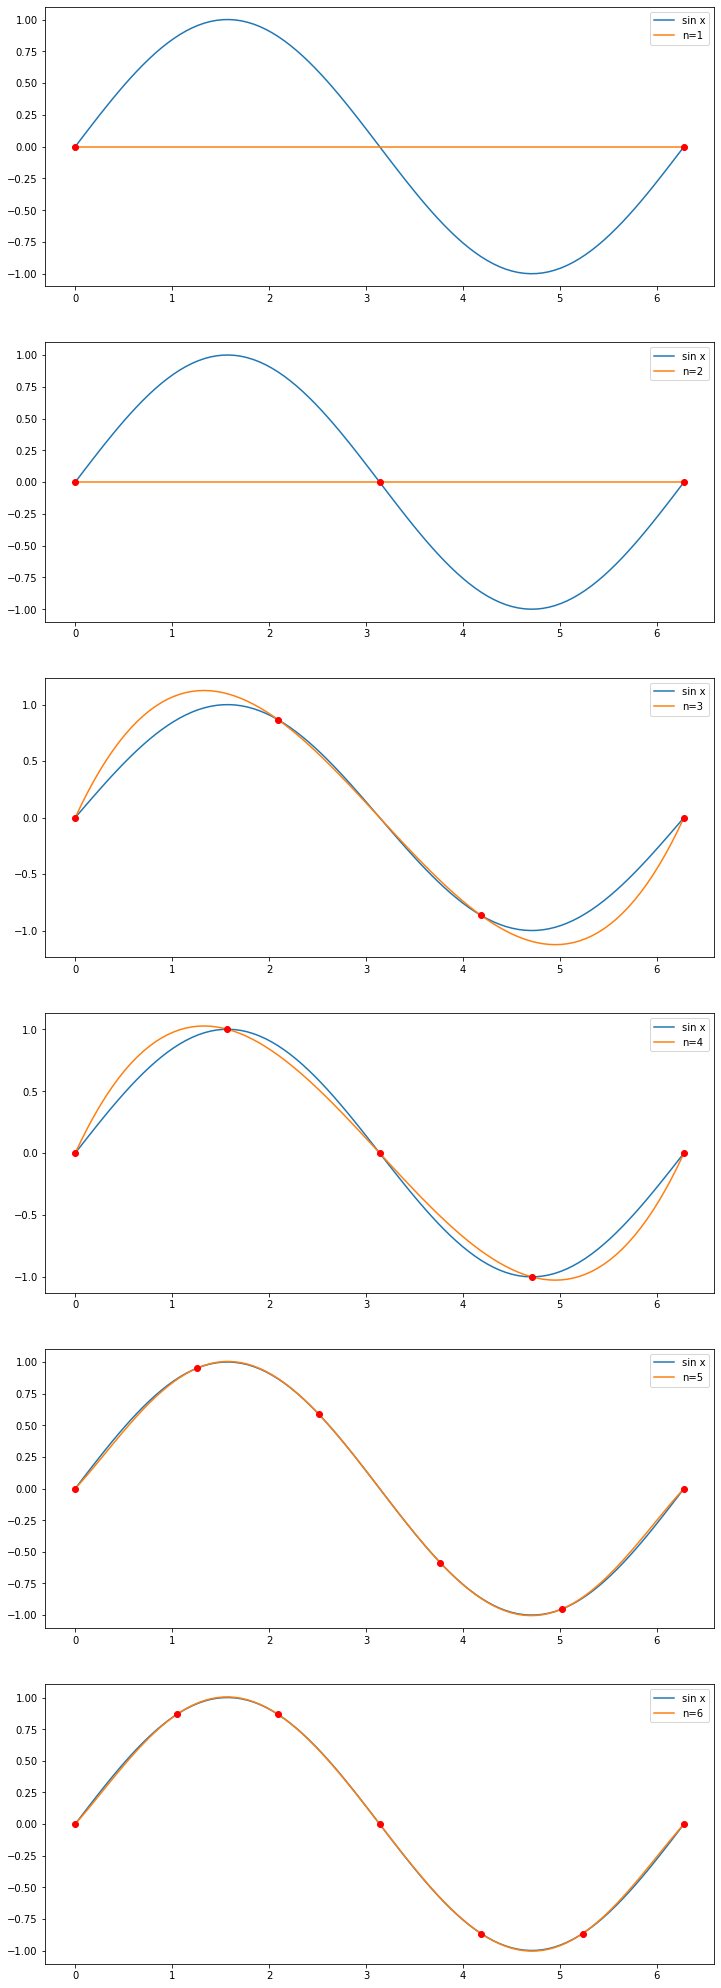

In [2]:
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(12,36))
num_nodes = 100
t = np.linspace(0,2*np.pi,num=num_nodes)
for n in range(1,7):
    x = np.linspace(0,2*np.pi,num=n+1)
    fx = np.sin(x)
    val = np.zeros(num_nodes)
    for j in range(0,num_nodes):
        val[j] = Lagrange_polynomial(t[j],x,fx)
    plt.subplot(6,1,n)
    plt.plot(t,np.sin(t),label='sin x')
    plt.plot(t,val,label='n={}'.format(n))
    plt.plot(x,fx,'ro')
    plt.legend()
plt.show()

## 3.2 Newton Divided Differences

With the Lagrange form, it is incovenient to pass from one interpolation polynomial to another of degree one greater.
<br>

Write
$$p_n(x) = p_{n-1}(x) + C(x), \qquad C(x) = \text{correction term},$$

where $C(x)$ is a polynomial of degree $n$.

Since $p_n(x)$ and $p_{n-1}(x)$ are interpolation polynomials,

$$C(x_i) = p_n(x_i) - p_{n-1}(x_i) = f(x_i) - f(x_i) = 0, \quad i = 0,\ 1,\ \cdots,\ n$$

Thus, $C(x) = a_n(x-x_0)\cdots(x-x_{n-1})$.

### Newton divided difference

Since $p_n(x_n) = f(x_n)$, we have

$$a_n = \frac{f(x_n) - p_{n-1}(x_n)}{(x_n - x_0)\cdots(x_n - x_{n-1})}$$
<br>
<br>

Here $a_n$ is called the *$n$-th order Newton divided difference* of $f$ and denoted by

$$a_n \equiv f[x_0,x_1,\cdots,x_n]$$

### Properties of Newton divided difference

- $f[x_0,x_1,\cdots,x_n] = f[x_{i_0}, x_{i_1},\cdots,x_{i_n}]$ for any permutation $(i_0,i_1,\cdots,i_n)$ of $(0,1,\cdots,n)$
<br>
<br>

- $\displaystyle f[x_0,x_1,\cdots,x_n] = \frac{[x_1,x_2,\cdots,x_n] - [x_0,x_1,\cdots,x_{n-1}]}{x_n - x_0}$

<img src="https://github.com/dw-shin/NA_notes/blob/master/chapter3/figures/newton_divided_difference.png?raw=true" height="30" align="center">

### Newton divided difference formula

\begin{align}
p_0(x) &= f(x_0) \\[2ex]
p_1(x) &= f(x_0) + (x-x_0)f[x_0,x_1] \\[2ex]
&\quad \vdots \\[2ex]
p_n(x) &= f(x_0) + (x-x_0)f[x_0,x_1] + (x-x_0)(x-x_1)f[x_0,x_1,x_2] \\
&\qquad +\cdots +(x-x_0)(x-x_1)\cdots(x-x_{n-1})f[x_0,x_1,\cdots,x_n]
\end{align}

***
**Algorithm** &emsp; Divdif($d,x,n$)

1. Remark: $d$ and $x$ are vectors with entries $f(x_i)$ and $x_i,\ i=0,1,\cdots,n$, respectively. On exit, $d_i$ will contain $f[x_0,\cdots,x_i]$.

2. Do through step 4 for $i=1,2,\cdots,n$.

3. Do through step 4 for $j=n,n-1,\cdots,i$.

4. $d_j = (d_j - d_j-1)/(x_j - x_{j-i})$.

5. Exit from the algorithm.
***

Wite the following code to evaluate divided difference for given $n$, $x_i$ and $f(x_i)$

In [3]:
def divdiff(d,x,n):
    for i in range(1,n+1):
        for j in reversed(range(i,n+1)):
            d[j] = (d[j] - d[j-1])/(x[j] - x[j-i])
    return d

***
**Algorithm** &emsp; Interp($d,x,n,t,p$)

1. Remark: On entrance, $d$ and $x$ are vectors containing $f[x_0,\cdots,x_n]$ and $x_i,\ i=0,1,\cdots,n$, respectively. On exit, $p$ will contain the value $p_n(t)$ of the $n$th-degree polynomial interpolating $f$ on $x$.

2. $p:= d_n$

3. Do through step 4 for $i = n-1, n-2, \cdots, 0$.

4. $p:= d_i + (t-x_i)p$

5. Exit the algorithm
***

Wite the following code to evaluate interpolation $p_n(t)$ using Newton divided difference formula.

In [4]:
def interp(d,x,n,t):
    p = d[n]
    for i in reversed(range(0,n)):
        p = d[i] + (t-x[i]) * p
    return p

<span style="color:blue">[Example]</span> &emsp; Draw interpolation function using Newton divided difference formula for $f(x) = \sin x$ on $[0,2\pi]$ with uniform nodes $0 = x_0 < x_1 < \cdots < x_n = 2\pi$ for $n = 1,2,...,6$

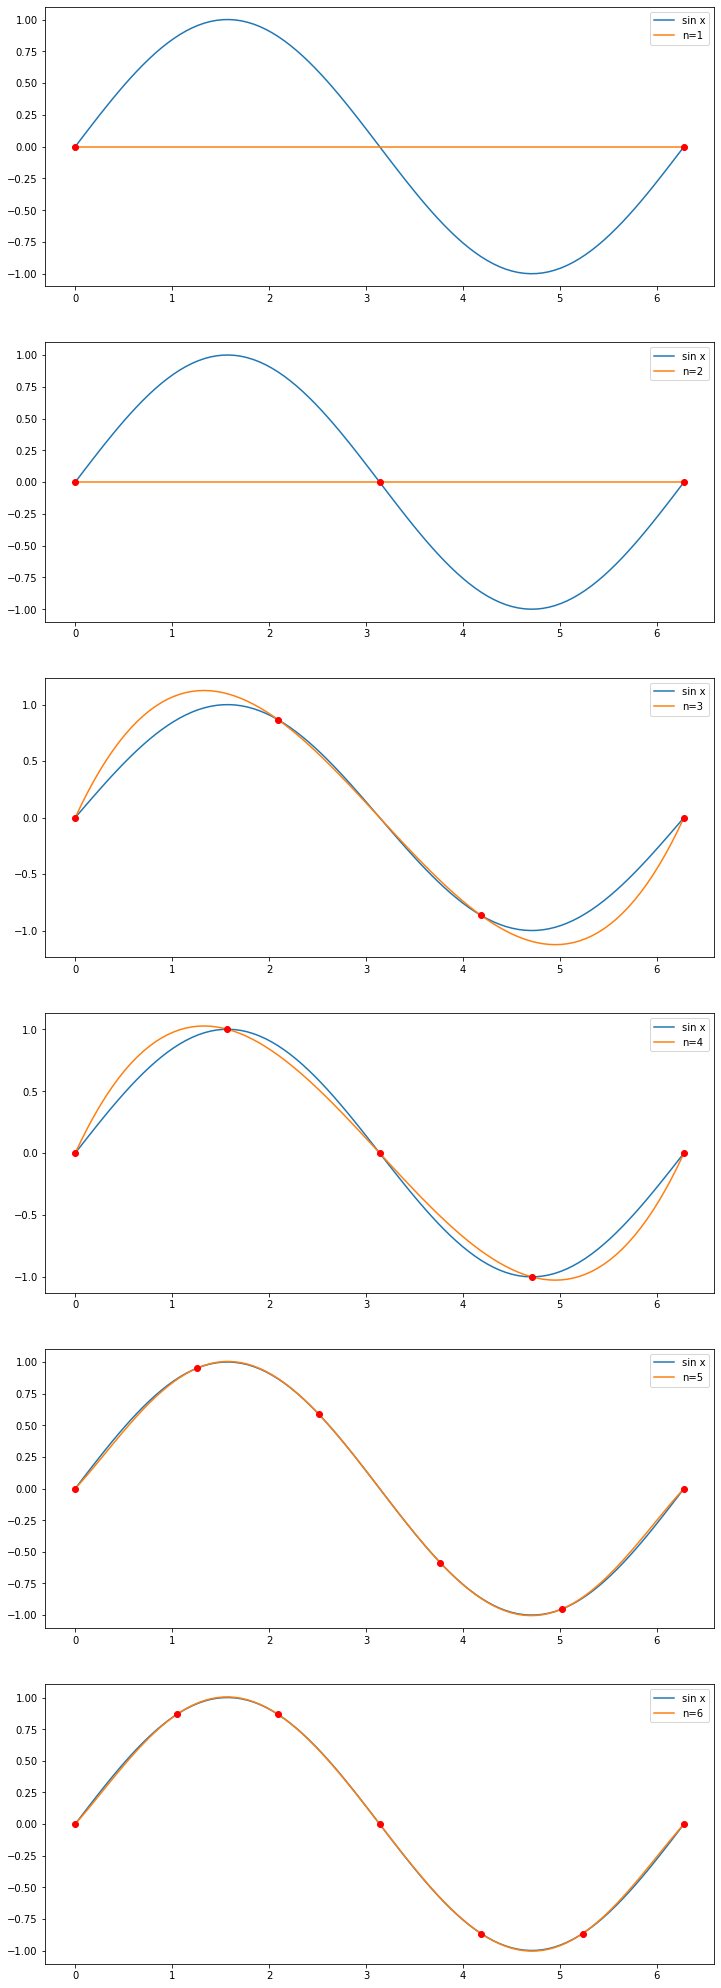

In [5]:
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(12,36))
num_nodes = 100
t = np.linspace(0,2*np.pi,num=num_nodes)
for n in range(1,7):
    x = np.linspace(0,2*np.pi,num=n+1)
    fx = np.sin(x)
    val = np.zeros(num_nodes)
    d = divdiff(np.sin(x),x,n)
    for j in range(0,num_nodes):
        val[j] = interp(d,x,n,t[j])
    plt.subplot(6,1,n)
    plt.plot(t,np.sin(t),label='sin x')
    plt.plot(t,val,label='n={}'.format(n))
    plt.plot(x,fx,'ro')
    plt.legend()
plt.show()

Compare the interpolation function using Newton divided difference with Lagrange polynomial interpolation

In [6]:
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(12,36))
num_nodes = 100
t = np.linspace(0,2*np.pi,num=num_nodes)
for n in range(1,7):
    x = np.linspace(0,2*np.pi,num=n+1)
    fx = np.sin(x)
    Lval = np.zeros(num_nodes)
    val = np.zeros(num_nodes)
    d = divdiff(np.sin(x),x,n)
    for j in range(0,num_nodes):
        Lval[j] = Lagrange_polynomial(t[j],x,fx)
        val[j] = interp(d,x,n,t[j])
    print('n={}: max |Lval - val| = {}'.format(n,np.max(np.abs(Lval-val))))

n=1: max |Lval - val| = 4.930380657631324e-32
n=2: max |Lval - val| = 4.930380657631324e-32
n=3: max |Lval - val| = 1.4990048891748452e-15
n=4: max |Lval - val| = 2.3376504586346497e-15
n=5: max |Lval - val| = 9.992007221626409e-16
n=6: max |Lval - val| = 2.3376504586346497e-15


<Figure size 864x2592 with 0 Axes>

### An interpolation error formula using divided differences

Let $t$ be a real number, distinct from the node points $x_0,x_1,\cdots,x_n$. Construct the polynomial interpolation to $f(x)$ at $x_0,\cdots,x_n$ and $t$:

$$p_{n+1}(x) = p_n(x) + (x-x_0)\cdots(x-x_n)f[x_0,\cdots,x_n,t]$$

### An interpolation error formula using divided differences

Since $f(t) = p_{n+1}(t)$, let $x=t$ to obtain

$$f(t) - p_n(t) = (t-x_0)\cdots(t-x_n)f[x_0,\cdots,x_n,t]$$
<br>

Combining the above with Lagrange error formula implies

$$f[x_0,\cdots,x_n,t] = \frac{f^{(n+1)}(\xi)}{(n+1)!}$$

for some $\xi \in \mathcal{H}\{x_0,x_1,\cdots,x_n,t\}$.

### An interpolation error formula using divided differences

Without loss of generality, we let $t = x_{n+1},\ n = m-1$ to obtain

$$f[x_0,x_1,\cdots,x_m] = \frac{f^{(m)}(\xi)}{m!} \qquad \text{some} \ \xi \in \mathcal{H}\{x_0,x_1,\cdots,x_n,t\}$$

: it looks like a truncated Taylor series for $f(x)$, expanded about $x_0$, provided the size $x_n - x_0$ is not too large.

### The approximation problem

Consider approximating a given function $f(x)$ on a given interval $[a,b]$ by using interpolating polynomials. In particular, consider the polynomial $p_n(x)$ produced by interpolating $f(x)$ on an evenly spaced subdivision of $[a,b]$. Then we ask whether
$$\max_{a\le x\le b} |f(x) - p_n(x)|$$
tend to zero as $n\rightarrow \infty$?: <span style="color:red"> Not necessarily!!!</span>

### Runge phenomenon

Let
$$f(x) = \frac{1}{1+x^2},\qquad -5\le x\le 5$$

For this example, it is shown that for any $3.64<|x|<5$,
$$\sup_{n\ge k} |f(x) - p_n(x)| = \infty, \quad \text{and}\ k\ge 0$$

### Runge phenominan

<img src="https://github.com/dw-shin/NA_notes/blob/master/chapter3/figures/runge.png?raw=true" height="30" align="center">

This happens near the end points! $\Longrightarrow$ there are suitable sets of grid points $\{x_j\}$ that do result in good approximations for all continuously differentiable functions.

<span style="color:blue">[Example]</span> &emsp; Draw interpolation function for $\displaystyle f(x) = \frac{1}{x^2+1}$ on $[-5,5]$ with uniform nodes $-5 = x_0 < x_1 < \cdots < x_n = 5$ for $n = 10,11,...,19$

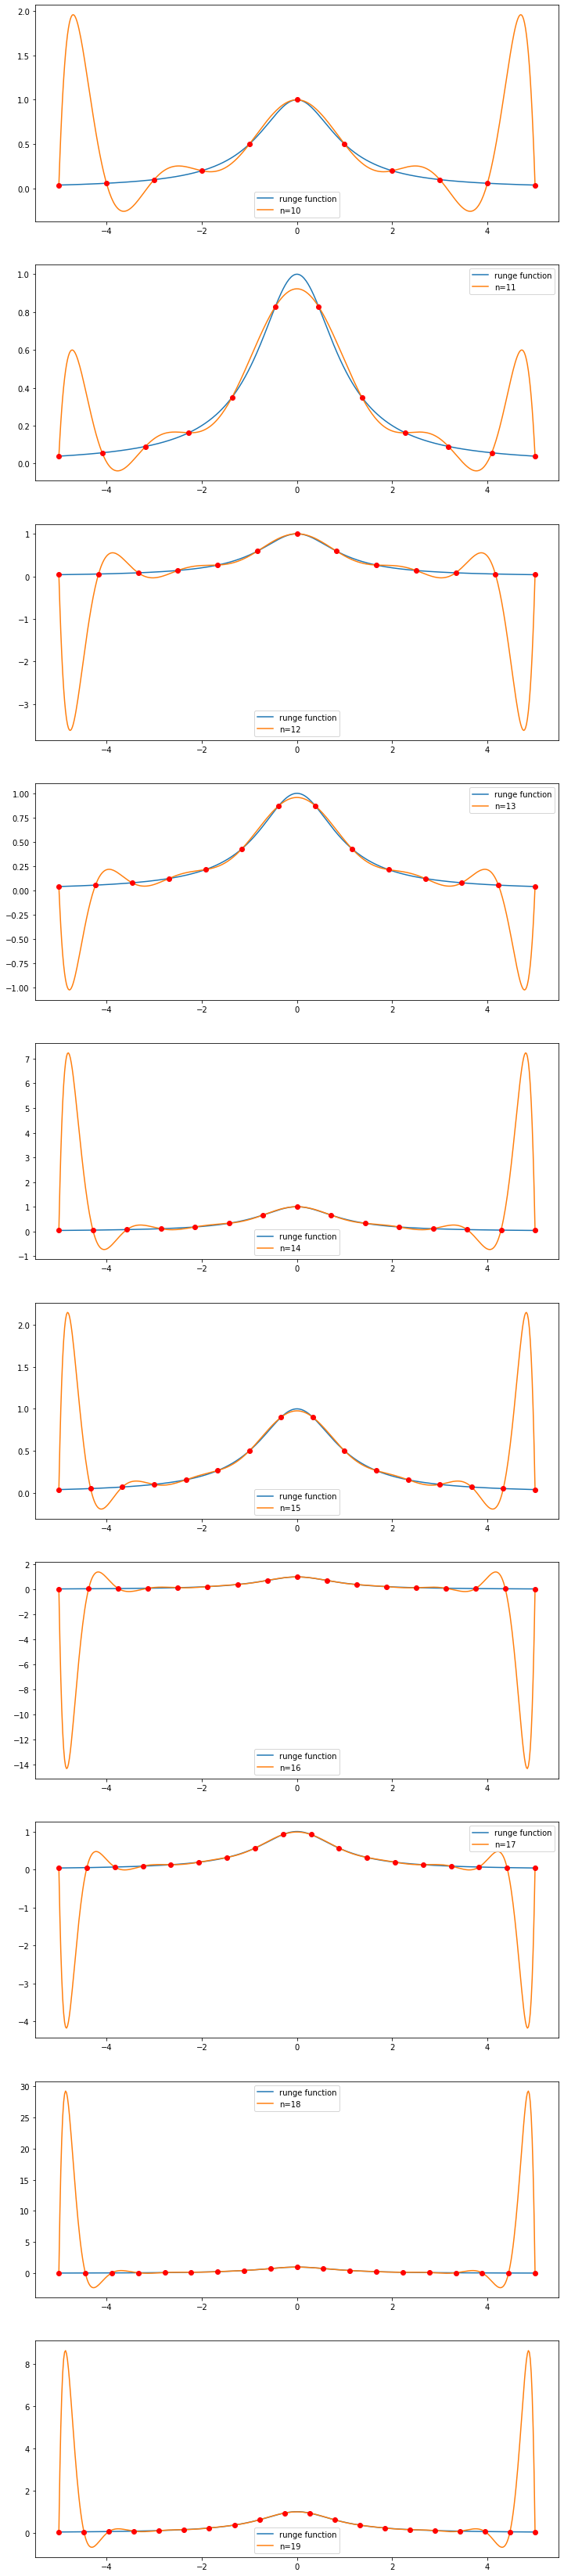

In [7]:
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(12,60))
num_nodes = 500
t = np.linspace(-5,5,num=num_nodes)
for n in range(10,20):
    x = np.linspace(-5,5,num=n+1)
    fx = 1/(x**2+1)
    val = np.zeros(num_nodes)
    d = divdiff(1/(x**2+1),x,n)
    for j in range(0,num_nodes):
        val[j] = interp(d,x,n,t[j])
    plt.subplot(10,1,n-9)
    plt.plot(t,1/(t**2+1),label='runge function')
    plt.plot(t,val,label='n={}'.format(n))
    plt.plot(x,fx,'ro')
    plt.legend()
plt.show()

## 3.6 Hermite Interpolation

Construct a polynomial that satisfies

$$p(x_i) = y_i,\quad p'(x_i) = y'_i, \quad i = 1,\cdots,n$$

where $x_1,\cdots,x_n$ are distinct nodes.
<br>

$\Longrightarrow \ 2n$ conditions $\Longrightarrow$ at most $2n-1$ degree polynomial.

### <span style='color:blue'> [Existence] </span> 

Let $\Psi_n(x) = (x-x_1)\cdots(x-x_n)$

$$\ell_i(x) = \frac{(x-x_1)\cdots(x-x_{i-1})(x-x_{i+1})\cdots(x-x_n)}{(x_i-x_1)\cdots(x_i-x_{i-1})(x_i-x_{i+1})\cdots(x_i-x_n)} = \frac{\Psi_n(x)}{(x-x_i)\Psi'_n(x_i)}$$

Let
\begin{align}
\widetilde{h}_i(x) &= (x-x_i)[\ell_i(x)]^2 \\
h_i(x) &= (1 - 2\ell'_i(x_i)(x-x_i))[\ell_i(x)]^2
\end{align}

Then
$$H_n(x) = \sum_{i=1}^n y_i h_i(x) + \sum_{i=1}^n y'_i \widetilde{h}_i(x)$$

### <span style='color:blue'> [Uniqueness] </span> 

Suppose $G(x)$ satisfies $G(x_i) = y_i,\ G'(x_i) = y'_i,\ i=1,\cdots,n$ with degree$\le 2n-1$. Define $R = H - G$. Since $R(x_i) = R'(x_i) = 0,\ i=1,\cdots,n$, $R$ has $n$ double roots, $x_1,\cdots,x_n$. That is, $R$ can be represented by

$$R(x) = q(x)(x-x_1)^2\cdots(x-x_n)^2, \ \text{for some polynomial } q(x).$$

If $q(x)\neq 0$, then $deg(R) \ge 2n$ which contradicts the fact $deg(R) \le 2n - 1$

### Newton divided difference form

\begin{align}
H(x) &= f(x_1) + (x-x_1)f[x_1,x_1] + (x-x_1)^2 f[x_1,x_1,x_2] + \cdots \\
&\quad + (x-x_1)^2\cdots(x-x_{n-1})^2(x-x_n)f[x_1,x_1,x_2,x_2,\cdots,x_n,x_n]
\end{align}

<span style='color:blue'> [Example] Cubic Hermite polynomial</span> 

$p(a)=f(a),\ p(b) = f(b),\ p'(a) = f'(a),\ p'(b) = f'(b)$

(sol)

\begin{align}
H_2(x) &= \left[1 + 2\frac{x-a}{b-a}\right]\left[\frac{b-x}{b-a}\right]^2 \cdot f(a) + \left[1 + 2\frac{b-x}{b-a}\right]\left[\frac{x-a}{b-a}\right]^2 \cdot f(b) \\[2ex]
&\qquad + \frac{(x-a)(b-x)^2}{(b-a)^2}\cdot f'(a) - \frac{(x-a)^2(b-x)}{(b-a)^2}\cdot f'(b)
\end{align}

## 3.7 Piecewise Polynomial Interpolation

For a piecewise polynomial function $p(x)$, there is an associated grid:

$$-\infty < x_0 < x_1 < \cdots < x_n < \infty$$

where the points $x_j$ are somtimes called *knots, breakpoints,* or *nodes*.
<br>
<br>

The function is a polynomial on each of subintervals

$$(-\infty,x_0],\ [x_0,x_1],\ \cdots,\ [x_n,\infty)$$

although often the intervals $(-\infty,x_0]$ and $[x_n,\infty)$ are not included.
<br>

We say $p(x)$ is a *piecewise polynomial of order* $r$ if the degree of $p(x)$ is less than $r$ on each of the subintervals.

 ### Local interpolation problems
 
 For a given interval $[a,b]$, we begin by choosing a grid
 
 $$a = x_0 < x_1 < \cdots < x_n = b$$
 
 Our first case of a piecewise polynomial function is based on using ordinary polynomial interpolation on each subinterval $[x_{i-1},x_i]$.
 <br>
 
 Let four interpolation nodes be given on each subinterval $[x_{i-1},x_i]$,
 
 $$x_{i-1}\le z_{i,1} < z_{i,2} < z_{i,3} < z_{i,4} \le x_i \qquad i = 1,\cdots,n$$
 
 Define $p(x)$ on $x_{i-1}<x<x_i$ by letting it be the polynomial of degree $\le 3$ that interpolates $f(x)$ at $z_{i,1},\cdots,z_{i,4}$.
 <br>
 
 If $z_{i,1} = x_{i-1},\ z_{i,4} = x_i,\ i = 1,2,\cdots,n$ then $p(x)$ is continuous on $[a,b]$

### Lagrange piecewise polynomial function

For the nodes in

$$x_{i-1}\le z_{i,1} < z_{i,2} < z_{i,3} < z_{i,4} \le x_i \qquad i = 1,\cdots,n$$

we call the interpolating function $p(z_{i,j}) = f(z_{i,j}), i = 1,\cdots,n,\ j = 1,\cdots, 4$ the *Lagrange piecewise polynomial function*, and it will be denoted by $L_n(x)$.
<br>
<br>

$$|f(x) - L_n(x)| \le \frac{\delta_i^4}{24}\max_{x_{i-1}\le t\le x_i} |f^{(4)}(t)| \qquad x_{i-1}<x<x_i$$

where $\displaystyle \delta_i = \frac{(x_i - x_{i-1})}{3}, \ z_{i,j} = x_{i-1} + (j-1)\delta_i,\ j=1,2,3,4$ for $i = 1,2,\cdots,n$

<span style="color:blue">[Example]</span> &emsp; Draw Lagrange piecewise polynomial function for $\displaystyle f(x) = \frac{1}{x^2+1}$ on $[-5,5]$ with 4 intervals and uniform nodes for $n = 1,2,...,6$

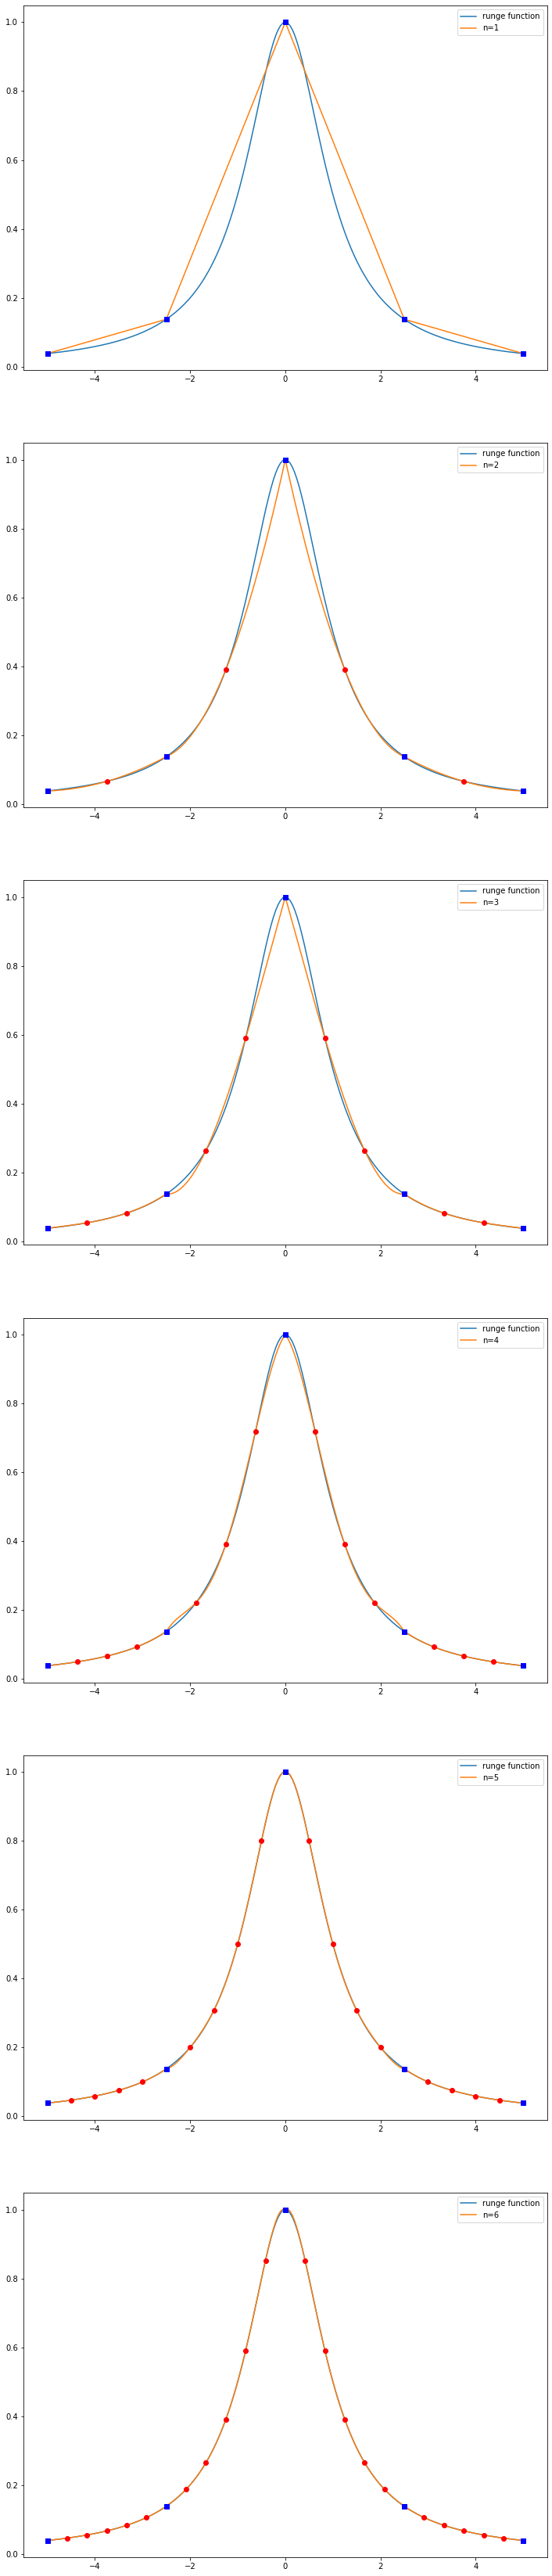

In [8]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(12,60))
num_interval = 4
num_interval_nodes = 50
num_plot_nodes = num_interval * num_interval_nodes
t = np.linspace(-5,5,num=num_plot_nodes+1)
ft = 1/(t**2+1)
for i in range(1,7):
    num_nodes = num_interval * i + 1
    x = np.linspace(-5,5,num=num_nodes)
    tt=[]
    val=[]
    for j in range(0,num_interval):
        x_local = x[j*i + np.arange(0,i+1)]
        fx_local = 1/(x_local**2 + 1)
        t_local = np.linspace(x[j*i],x[j*i + i],num=num_interval_nodes)
        val_local = np.zeros(num_interval_nodes)
        for k in range(0,num_interval_nodes):
            val_local[k] = Lagrange_polynomial(t_local[k],x_local,fx_local)
        tt=np.append(tt,t_local)
        val=np.append(val,val_local)
    plt.subplot(6,1,i)
    plt.plot(t,1/(t**2+1),label='runge function')
    plt.plot(tt,val,label='n={}'.format(i))
    plt.plot(x,1/(x**2+1),'ro')
    plt.plot(x[0:-1:i],1/(x[0:-1:i]**2+1),'bs')
    plt.plot(x[-1],1/(x[-1]**2+1),'bs')
    plt.legend()
plt.show()

### Cubic Hermite interpolation polynomial

On each subinterval $[x_{i-1},x_i]$, let $Q_n(x)$ be the cubic Hermite polynomial interpolating $f(x)$ at $x_{i-1}$ and $x_i$.

The function $Q_n(x)$ is piecewise cubic on the grid, and because of the interpolation condition, both $Q_n(x)$ and $Q'_n(x)$ are continuous on $[a,b]$

Thus $Q_n(x)$ will generally be smoother than $L_n(x)$

$$|f(x) - Q_n(x)| \le \frac{h^4_i}{384} \max_{x_{i-1}\le t\le x_i} |f^{(4)}(t)| \qquad x_{i-1}<x<x_i$$

with $h_i = x_i - x_{i-1},\ 1\le i \le n$

### Spline functions

Consider a grid

$$a=x_0 < x_1 < \cdots < x_n = b$$

We say $s(x)$ is a *spline function* of order $m\ge 1$ if it satisfies the following two properties:

(P1) $s(x)$ is a polynomial of degree $<m$ on each subinterval $[x_{i-1},x_i]$

(P2) $s^{(r)}(x)$ is continuous on $[a,b]$ for $0\le r \le m-2$

### Cubic spline

Cubic spline functions (order $m=4$) are the most popular spline functions, for a variety of reasons.
They are smooth functions with which to fit data, and when used for interpolation, they do not have the oscillatory behavior that is characteristic of high-degree polynomial interpolation.

### Constuction of cubic spline $s(x)$

Find a cubic spline $s(x)$ for which

$s(x_i) = y_i,\quad i = 0,1,\cdots, n \qquad $ <span style='color:blue'> $n+1$ conditions </span>

On each interval, we have to compute

$s_i(x) = a_i + b_i x + c_i x^2 + d_i x^3,\quad x_{i-1}\le x\le x_i,\ i=1,\cdots,n \qquad$ <span style='color:blue'> $4n$ unknowns</span>

From the resriction (P2):

$s^{(j)}_{i-1}(x_i) = s^{(j)}_i(x_i),\quad j=0,1,2 \qquad$ <span style='color:blue'> $3(n-1)$ conditions</span>

Needs extra conditions on $s(x)$ in order to obtain a unique interpolating spline.

### Algorithm (Natural Cubic Spline)

Given the interpolation points $(t_i,y_i)$ for $i = 0,1,\cdots,n$:

1. Compute for $i=0,1,\cdots,n-1$:
$$h_i = t_{i+1} - t_i,\qquad b_i = \frac{1}{h_i}(y_{i+1}-y_i)$$
<br>

2. Set
$$u_1 = 2(h_0 + h_1),\qquad v_1 = 6(b_1 - b_0)$$
and compute inductively for $i=2,3,\cdots,n-1$:
$$u_i = 2(h_i + h_{i+1}) - \frac{h_{i-1}^2}{u_{i-1}},\qquad v_i = 6(b_i - b_{i-1}) - \frac{h_{i-1}v_{i-1}}{u_{i-1}}$$
<br>

3. Set
$$z_0 = 0,\qquad z_n = 0$$
and compute inductively for $i=n-1,n-2,\cdots,1$:
$$z_i = \frac{v_i - h_i z_{i+1}}{u_i}$$

Wite the following code to evaluate coefficients for the natural cubic spline.

In [ ]:
def natural_spline3_coef(n,t,y):
    h = np.zeros(n+1)
    b = np.zeros(n+1)
    u = np.zeros(n+1)
    v = np.zeros(n+1)
    z = np.zeros(n+1)
    
    return z

In [2]:
def natural_spline3_eval(n,t,y,z,x):
    for i in reversed(range(0,n)):
        if x - t[i] >= 0:
            break
    h = t[i+1]-t[i]
    tmp = (z[i]/2) + (x-t[i])*(z[i+1]-z[i])/6/h
    tmp = -(h/6)*(z[i+1]+2*z[i]) + (y[i+1]-y[i])/h + (x-t[i])*tmp
    val = y[i] + (x-t[i])*tmp
    return val

<span style="color:blue">[Example]</span> &emsp; Draw the natural cubic spline for $f(x) = \sin x$ on $[0,2\pi]$ with uniform nodes $0 = x_0 < x_1 < \cdots < x_n = 2\pi$

<span style="color:blue">[Example]</span> &emsp; Draw the natural cubic spline for $\displaystyle f(x) = \frac{1}{x^1+1}$ on $[-5,5]$